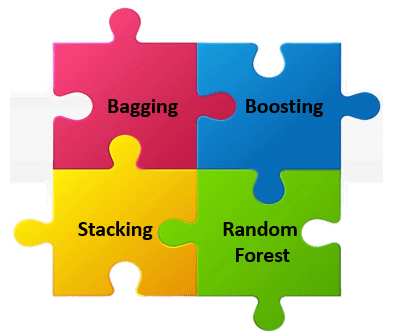

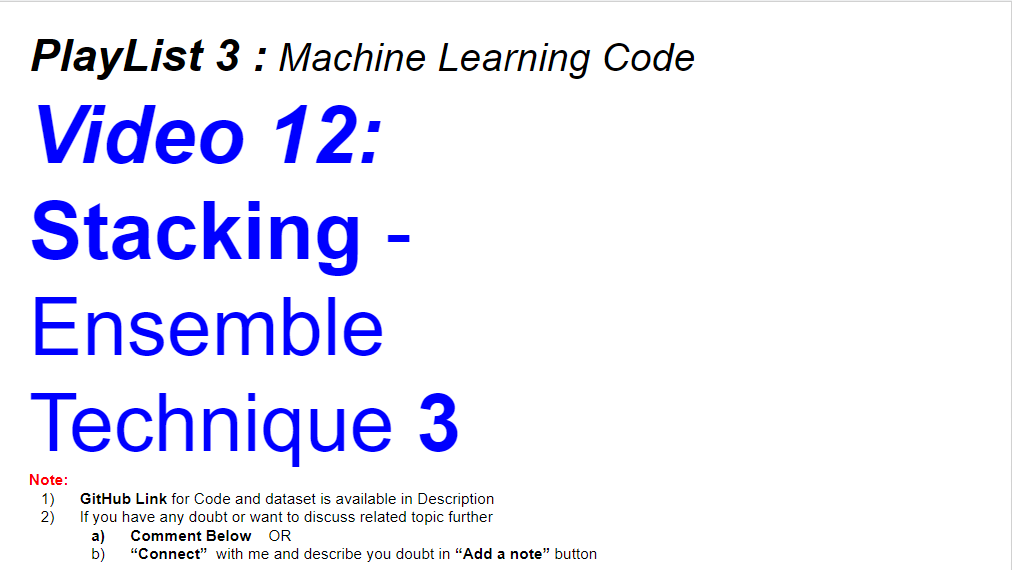

# Stacking

In [17]:
# Difference in Mechanicsms of Ensemble Techniques
        # Bagging ~ ALl models are executed silmultaneously
                   # ~ Models will be of only 1 Category (homogeneous)
        # Stacking ~ Models are executed in Sequence
                    # ~ Models can be of only Multiple Categories (hetro-geneous)

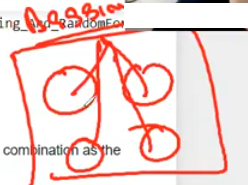

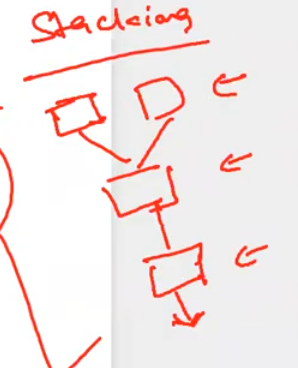

the steps involved for stacking:

*	Split the dataset into a training set and a holdout set. We can use k-fold validation for seleting different set of validation sets.

   Generally, we do a 50-50 split of the training set and the hold out set. 
   
   training set = x1,y1
   hold out set = x2, y2

*	Split the training set again into training and test dataset e.g. x1_train, y1_train, x1_test, y1_test

*	Train all the base models on training set  x1_train, y1_train.

*	After training is done, get the predictions of all the base models on the validation set x2. 

*	Stack all these predictions together (you can also take an average of all the predictions or probability prediction) as it will be used as input feature for the meta_model.

*	Again, get the prediction for all the base models on the test set i.e. x1_test 

*	Again, stack all these predictions together (you can also take an average of all the predictions or probability prediction) as it will be used as the prediction dataset for the meta_model.

*	Use the stacked data from step 5 as the input feature for meta_model and validation set y2 as the target variable and train the model on these data.

*	Once, the training is done check the accuracy of meta_model by using data from step 7 for prediction and y1_test for evaluation.


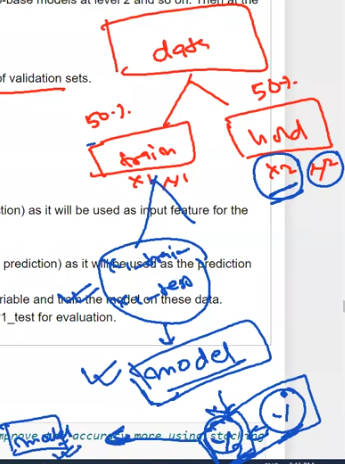

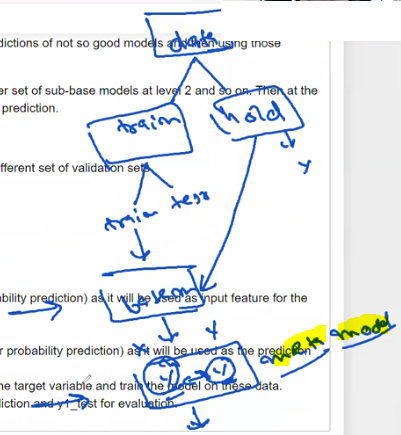

In [19]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
# splitting dependent (y) and independent(Xi) variables
X = df.drop(columns='Outcome') 
    # Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
y = df['Outcome']
    # 1 = Yes, Diabetic
    # 0 = Not Diabetic

In [33]:
# Step 1: lets 50-50 split of the dataset into 
        # training and
        # hold-out dataset
from sklearn.model_selection import train_test_split
train, val_train, test, val_test = train_test_split(X,y,test_size=0.5, #50% is reserved for "hold-out dataset"
                                                    random_state=355)

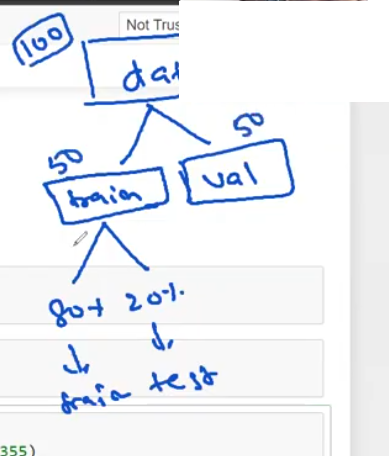

In [34]:
# Step 2:Splitting the training dataset further into
        # training and
        # test dataset
        
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,test,
                                                 test_size=0.2, #20% is reserved for "testing of TRAINING dataset"
                                                 random_state=355)

We will use KNN and SVM algorithm as our base models.

Let's fit both of the models first on the x_train and y_train data.

In [48]:
#BaseModel 1

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train) # training the KNN model
knn.score(X_test,y_test) # Calculating the accuracy of KNN model

0.7402597402597403

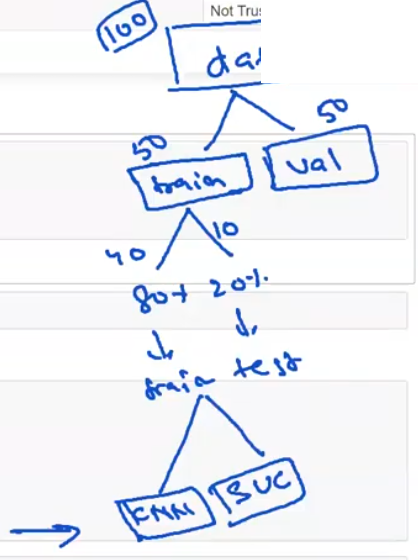

In [49]:
#BaseModel 2

# SVC ~ Support Vector Classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train) # training the SVC model
svm.score(X_test,y_test) # Calculating the accuracy of SVC model

0.7402597402597403

In [54]:
#BaseModel 3

from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train,y_train) # training the "RandomForestClassifier" model
rand_clf.score(X_test,y_test) # Calculating the accuracy of "RandomForestClassifier" model

0.8051948051948052

In [56]:
# Lets get prediction of all the base models on the validation set "val_train"
predict_val1 = knn.predict(val_train)
predict_val2 = svm.predict(val_train)
predict_val3 = rand_clf.predict(val_train)

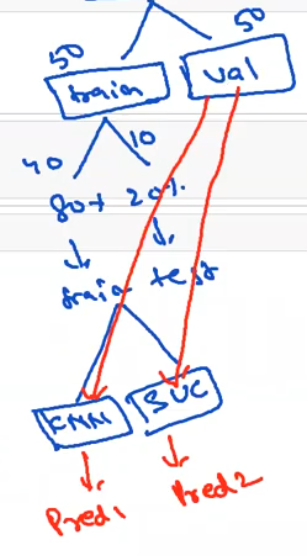

In [60]:
predict_val1
# 1 = Yes, Diabetic
# 0 = Not Diabetic

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [58]:
predict_val2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,

In [59]:
predict_val3

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,

In [67]:
#Lets stack the prediction values for validation set together as "predict_val"

import numpy as np
predict_val = np.column_stack((predict_val1,
                               predict_val2,
                               predict_val3))
# "np.column_stack" ~ stacking of the data columnwise
predict_val

# Compare (1st and last) 3 values (above vs below) 

array([[0, 0, 1],
       [0, 0, 0],
       [1, 1, 0],
       ...,
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0]], dtype=int64)

In [65]:
# Lets get the prediction for all those models on the test set "x_test"
predict_test1 = knn.predict(X_test)
predict_test2 = svm.predict(X_test)
predict_test3 = rand_clf.predict(X_test)

In [66]:
# Lets stack the prediction values for validation set together as "predict_test"
import numpy as np
predict_test = np.column_stack((predict_test1,
                               predict_test2,
                               predict_test3))
# "np.column_stack" ~ stacking of the data columnwise
predict_test

array([[1, 0, 1],
       [0, 0, 0],
       [1, 1, 1],
       [1, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 1, 1],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 0],
       [1, 0, 0],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0,

In [69]:
# Let's use the Stacked data "predict_val" and "val_test" as the input feature
        # for meta_model i.e - RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val,val_test) # training the "RandomForestClassifier" model
rand_clf.score(predict_test,y_test) # Calculating the accuracy of "RandomForestClassifier" model

0.7922077922077922

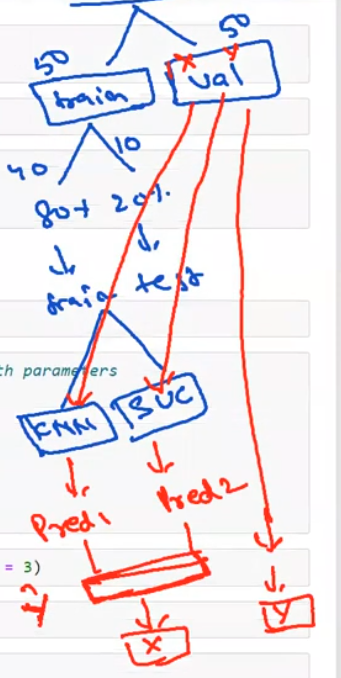

# HyperTuning with GridSearch CV

In [72]:
## tuning 3(+1) hyperparameters right now,
    # we are passing differnt values for each parameter

grid_param = {
    'n_estimators' : [90,100,115],
    'criterion' : ['gini','entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split' : [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [76]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rand_clf,
                           param_grid=grid_param,
                           cv=5,
                           n_jobs=-1, #"-1" employs all processors
                           verbose=3)
grid_search.fit(predict_val,val_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [90, 100, 115]},
             verbose=3)

In [78]:
grid_search.best_params_
# o/p the list of best parameters

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [80]:
# lets employ the above's "best parameters"
rand_clf = RandomForestClassifier(criterion = 'gini',
                                  max_features =  'auto',
                                  min_samples_leaf = 1,
                                  min_samples_split = 4,
                                  n_estimators = 100)

rand_clf.fit(predict_val,val_test) # training the "RandomForestClassifier" model
rand_clf.score(predict_test,y_test) # Calculating the accuracy of "RandomForestClassifier" model

0.7922077922077922

In [ ]:
# case by case evaluation of the model

In [82]:
predict_val
# last row = [1, 0, 0]

array([[0, 0, 1],
       [0, 0, 0],
       [1, 1, 0],
       ...,
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0]], dtype=int64)

In [83]:
val_test
# last row = 0

616    0
727    0
93     1
503    0
596    0
      ..
435    1
236    1
167    0
379    0
442    0
Name: Outcome, Length: 384, dtype: int64

In [89]:
#rand_clf.fit(predict_val,val_test)
rand_clf.predict([[1,0,0]])
# got o/p as [0]
    #So, Correct

array([0], dtype=int64)